In [27]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)
clinical = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merged = pd.merge(mouse,clinical)

# Display the data table for preview
merged.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [113]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_data = merged.groupby(['Drug','Timepoint'])
mean_grouped = mean_tumor_data['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
mean_grouped = mean_grouped.reset_index()
mean_grouped.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [114]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame

standard_error_grouped = merged.groupby(['Drug','Timepoint'])
standard_error = standard_error_grouped['Tumor Volume (mm3)'].sem()
standard_error = standard_error.reset_index()
standard_error.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [115]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
reformat = mean_grouped.pivot(index='Timepoint',columns='Drug')
reformat.head()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

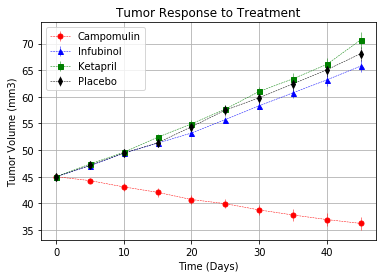

In [329]:
# Generate the Plot (with Error Bars)

# Save the Figure
error_reformat1 = standard_error.pivot(index='Timepoint',columns='Drug')

x_axis = np.arange(0, 50, 5)
fig, ax = plt.subplots()

campomulin_error1 = error_reformat1.iloc[:,0]
campomulin_tumor = reformat.iloc[:,0]
campomulin_error_list1 = [s for s in campomulin_error1]
campomulin_tumor_list = [t for t in campomulin_tumor]    
ax.errorbar(x_axis,campomulin_tumor_list,campomulin_error_list1, fmt="o--",c='red',linewidth=.5,markersize=5)

infubinol_error1 = error_reformat1.iloc[:,2]
infubinol_tumor = reformat.iloc[:,2]
infubinol_error_list1 = [s for s in infubinol_error1]
infubinol_tumor_list = [t for t in infubinol_tumor]    
ax.errorbar(x_axis,infubinol_tumor_list,infubinol_error_list1, fmt="^--",c='blue',linewidth=.5,markersize=5)

ketapril_error1 = error_reformat1.iloc[:,3]
ketapril_tumor = reformat.iloc[:,3]
ketapril_error_list1 = [s for s in ketapril_error1]
ketapril_tumor_list = [t for t in ketapril_tumor]    
ax.errorbar(x_axis,ketapril_tumor_list,ketapril_error_list1, fmt="s--",c='green',linewidth=.5,markersize=5)

placebo_error1 = error_reformat1.iloc[:,5]
placebo_tumor = reformat.iloc[:,5]
placebo_error_list1 = [s for s in placebo_error1]
placebo_tumor_list = [t for t in placebo_tumor]    
ax.errorbar(x_axis,placebo_tumor_list,placebo_error_list1, fmt="d--",c='black',linewidth=.5,markersize=5)

plt.grid()
plt.legend(['Campomulin','Infubinol','Ketapril','Placebo'])
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig("Images/TumorResponseToTreatment.png")
plt.show()


## Metastatic Response to Treatment

In [180]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_response = merged[['Drug','Timepoint','Metastatic Sites']]
# Convert to DataFrame
meta_grouped = meta_response.groupby(['Drug','Timepoint']).mean()
# Preview DataFrame
meta_grouped.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [231]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint


# Convert to DataFrame

# Preview DataFrame
meta_standarderror = meta_response.groupby(['Drug','Timepoint']).sem()

meta_standarderror.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [241]:
meta_standarderror = meta_standarderror.reset_index()
error_reformat = meta_standarderror.pivot(columns='Drug',index='Timepoint')
error_reformat.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378

In [183]:
# Minor Data Munging to Re-Format the Data Frames
meta_response1 = meta_response.groupby(['Drug','Timepoint'])
# Preview that Reformatting worked
mean_response = meta_response1['Metastatic Sites'].mean()
mean_response = mean_response.reset_index()
reformat1 = mean_response.pivot(columns='Drug',index='Timepoint')
reformat1.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

In [8]:
# I think this is the wrong preview? Showing data for Tumor Volume not Metastatic Sites.

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


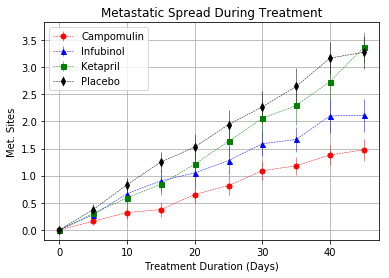

In [330]:
# Generate the Plot (with Error Bars)

# Save the Figure
x_axis = np.arange(0, 50, 5)
# Show the Figure
fig, ax = plt.subplots()

campomulin_error = error_reformat.iloc[:,0]
campomulin_response = reformat1.iloc[:,0]
campomulin_error_list = [s for s in campomulin_error]
campomulin_response_list = [t for t in campomulin_response]    
ax.errorbar(x_axis,campomulin_response_list,campomulin_error_list, fmt="o--",c='red',linewidth=.5,markersize=5)

infubinol_error = error_reformat.iloc[:,2]
infubinol_response = reformat1.iloc[:,2]
infubinol_error_list = [s for s in infubinol_error]
infubinol_response_list = [t for t in infubinol_response]    
ax.errorbar(x_axis,infubinol_response_list,infubinol_error_list, fmt="^--",c='blue',linewidth=.5,markersize=5)

ketapril_error = error_reformat.iloc[:,3]
ketapril_response = reformat1.iloc[:,3]
ketapril_error_list = [s for s in ketapril_error]
ketapril_response_list = [t for t in ketapril_response]    
ax.errorbar(x_axis,ketapril_response_list,ketapril_error_list, fmt="s--",c='green',linewidth=.5,markersize=5)

placebo_error = error_reformat.iloc[:,5]
placebo_response = reformat1.iloc[:,5]
placebo_error_list = [s for s in placebo_error]
placebo_response_list = [t for t in placebo_response]    
ax.errorbar(x_axis,placebo_response_list,placebo_error_list, fmt="d--",c='black',linewidth=.5,markersize=5)

plt.grid()
plt.legend(['Campomulin','Infubinol','Ketapril','Placebo'])
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.savefig("Images/MetastaticSpreadDuringTreatment.png")
plt.show()

## Survival Rates

In [342]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice = merged[['Drug','Timepoint','Mouse ID']]
# Convert to DataFrame
mice_count = mice.groupby(['Drug','Timepoint']).count()
# Preview DataFrame
mice_count = mice_count.reset_index()
mice_count['Mouse Count'] = mice_count['Mouse ID']
del mice_count['Mouse ID']
mice_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [344]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
reformat2 = mice_count.pivot(columns='Drug',index='Timepoint')
reformat2.head(10)

Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       26   
5                  25       21        25       23       23      24       25   
10                 25       20        21       22       21      24       23   
15                 24       19        21       19       21      20       17   
20                 23       18        20       19       20      19       17   
25                 22       18        18       19       18      17       14   
30                 22       16        17       18       15      15       13   
35                 22       14        12       17       15      14       10   
40                 21       14        10       15       15      12        9   
45                 21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

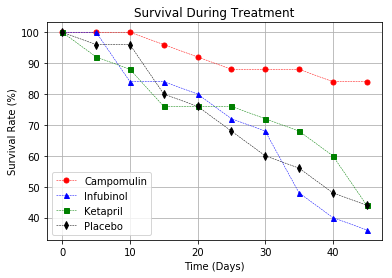

In [363]:
# Generate the Plot (Accounting for percentages)
campomulin_percent = reformat2.iloc[:,0]
campomulin_percent_list = [s for s in campomulin_percent]
campomulin_list_1 = []
for i in range(len(campomulin_percent_list)):
    g = (1-(campomulin_percent_list[0]-campomulin_percent_list[i])/campomulin_percent_list[0])*100
    campomulin_list_1.append(g)  
plt.plot(x_axis,campomulin_list_1, marker="o",c='red',linewidth=.5,markersize=5,ls='dashed')

infubinol_percent = reformat2.iloc[:,2]
infubinol_percent_list = [s for s in infubinol_percent]
infubinol_list_1 = []
for i in range(len(infubinol_percent_list)):
    g = (1-(infubinol_percent_list[0]-infubinol_percent_list[i])/infubinol_percent_list[0])*100
    infubinol_list_1.append(g)  
plt.plot(x_axis,infubinol_list_1, marker="^",c='blue',linewidth=.5,markersize=5,ls='dashed')

ketapril_percent = reformat2.iloc[:,3]
ketapril_percent_list = [s for s in ketapril_percent]
ketapril_list_1 = []
for i in range(len(ketapril_percent_list)):
    g = (1-(ketapril_percent_list[0]-ketapril_percent_list[i])/ketapril_percent_list[0])*100
    ketapril_list_1.append(g)  
plt.plot(x_axis,ketapril_list_1, marker="s",c='green',linewidth=.5,markersize=5,ls='dashed')

placebo_percent = reformat2.iloc[:,5]
placebo_percent_list = [s for s in placebo_percent]
placebo_list_1 = []
for i in range(len(placebo_percent_list)):
    g = (1-(placebo_percent_list[0]-placebo_percent_list[i])/placebo_percent_list[0])*100
    placebo_list_1.append(g)  
plt.plot(x_axis,placebo_list_1, marker="d",c='black',linewidth=.5,markersize=5,ls='dashed')
# Save the Figure
plt.grid()
# Show the Figure
plt.legend(['Campomulin','Infubinol','Ketapril','Placebo'])
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.savefig("Images/SurvivalDuringTreatment.png")

## Summary Bar Graph

In [386]:
# Calculate the percent changes for each drug

# Display the data to confirm
summary = mean_grouped['Tumor Volume (mm3)']
summary_list = []
for i in summary:
    summary_list.append(i)
percent_change = mean_grouped.loc[mean_grouped['Timepoint'] == 45,:]
percent_change['Percent Change'] = ((percent_change['Tumor Volume (mm3)']-45)/45)*100
percent_change=percent_change.set_index('Drug')
final = percent_change['Percent Change']
final

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: Percent Change, dtype: float64

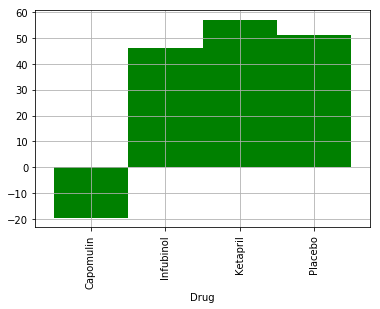

In [458]:
# Store all Relevant Percent Changes into a Tuple
tup = tuple(zip(final,final.index))

# Splice the data between passing and failing drugs
failed = []
passed = []
for i in tup:
    if i[0] > 0:
        failed.append(i)
    else:
        passed.append(i)

# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure
new_final = percent_change.loc[['Capomulin','Infubinol','Ketapril','Placebo'],'Percent Change']
percent_list = [s for s in new_final]
x = new_final.index
barchart = new_final.plot(kind='bar',width=1,color='green',label='Percent Change')

# Show the Figure

plt.grid()

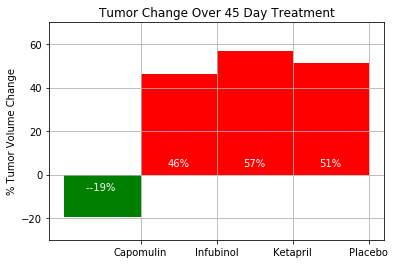